<a href="https://colab.research.google.com/github/rushikeshbhusari/HomePricePrediction1/blob/main/Home_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Reading csv file
df=pd.read_excel("/content/HousePricePrediction.xlsx")

In [79]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64

In [80]:
 # Checking dimension of the dataframe
df.ndim

2

In [81]:
# checking shape of dataframe
df.shape

(2919, 13)

In [82]:
 #  Available colums in the dataframe
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [83]:
# Cheking whether there is NULL values or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


# **Detecting null values**

In [84]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

# **Cleaning and handling missing vaalues**

In [85]:
df["MSZoning"]=df["MSZoning"].fillna(df["MSZoning"].mode()[0])
df["Exterior1st"]=df["Exterior1st"].fillna(df["Exterior1st"].mode()[0])
df["BsmtFinSF2"]=df["BsmtFinSF2"].fillna(df["BsmtFinSF2"].mode()[0])
df["TotalBsmtSF"]=df["TotalBsmtSF"].fillna(df["TotalBsmtSF"].mode()[0])
df["SalePrice"]=df["SalePrice"].fillna(df["SalePrice"].mode()[0])

In [86]:
df.isna().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

# **Correlation among numeric veriable variables**

In [87]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [88]:
numeric_df.corr()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
Id,1.000000,0.008931,-0.040746,-0.002839,-0.016581,-0.050438,0.018170,-0.025538,-0.303717
MSSubClass,0.008931,1.000000,-0.201730,-0.065625,0.034409,0.043315,-0.072431,-0.219008,-0.057649
LotArea,-0.040746,-0.201730,1.000000,-0.035617,0.024128,0.021612,0.084107,0.254316,0.236985
OverallCond,-0.002839,-0.065625,-0.035617,1.000000,-0.368477,0.047654,0.041359,-0.174837,-0.048399
YearBuilt,-0.016581,0.034409,0.024128,-0.368477,1.000000,0.612235,-0.027507,0.408750,0.345886
YearRemodAdd,-0.050438,0.043315,0.021612,0.047654,0.612235,1.000000,-0.061959,0.299019,0.342756
BsmtFinSF2,0.018170,-0.072431,0.084107,0.041359,-0.027507,-0.061959,1.000000,0.089561,-0.013313
TotalBsmtSF,-0.025538,-0.219008,0.254316,-0.174837,0.408750,0.299019,0.089561,1.000000,0.410094
SalePrice,-0.303717,-0.057649,0.236985,-0.048399,0.345886,0.342756,-0.013313,0.410094,1.000000


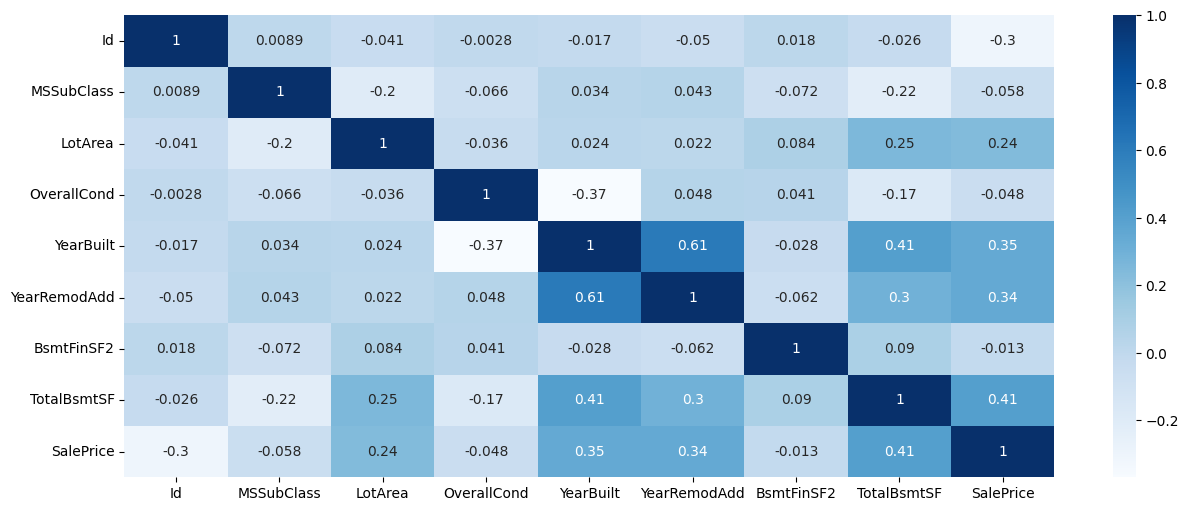

In [89]:
# correlation Heatmap
plt.figure(figsize=(15,6))
sns.heatmap(numeric_df.corr(),annot=True, cmap="Blues")
plt.show()

# **Observations**

1.   There is possitive correlation between Year Built and SalePrice. This suggests that
 these two variables are highly correlated and likely convey very similar information.




In [90]:
# for numeric values
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.565262,1051.417266,160467.607400
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.179104,441.120498,59785.743435
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,140000.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.000000,140000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,163000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [91]:
# for Object data type
df.describe(include=object)

,MSZoning,LotConfig,BldgType,Exterior1st
count,2919,2919,2919,2919
unique,5,5,5,15
top,RL,Inside,1Fam,VinylSd
freq,2269,2133,2425,1026


# **Distribution across the categorical variables**

In [92]:
Categorical_col=['MSZoning','LotConfig','BldgType','Exterior1st']
for i in Categorical_col:
  y=df[i].value_counts()
  print(y,"\n")


MSZoning
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64 

LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64 

BldgType
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: count, dtype: int64 

Exterior1st
VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64 



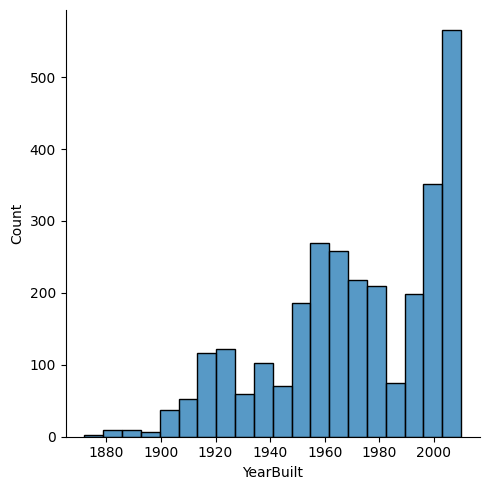

In [93]:
sns.displot(df["YearBuilt"],bins=20)
plt.show()


# **Observation**

*   As the year passes cunstruction of the houses also goes high.




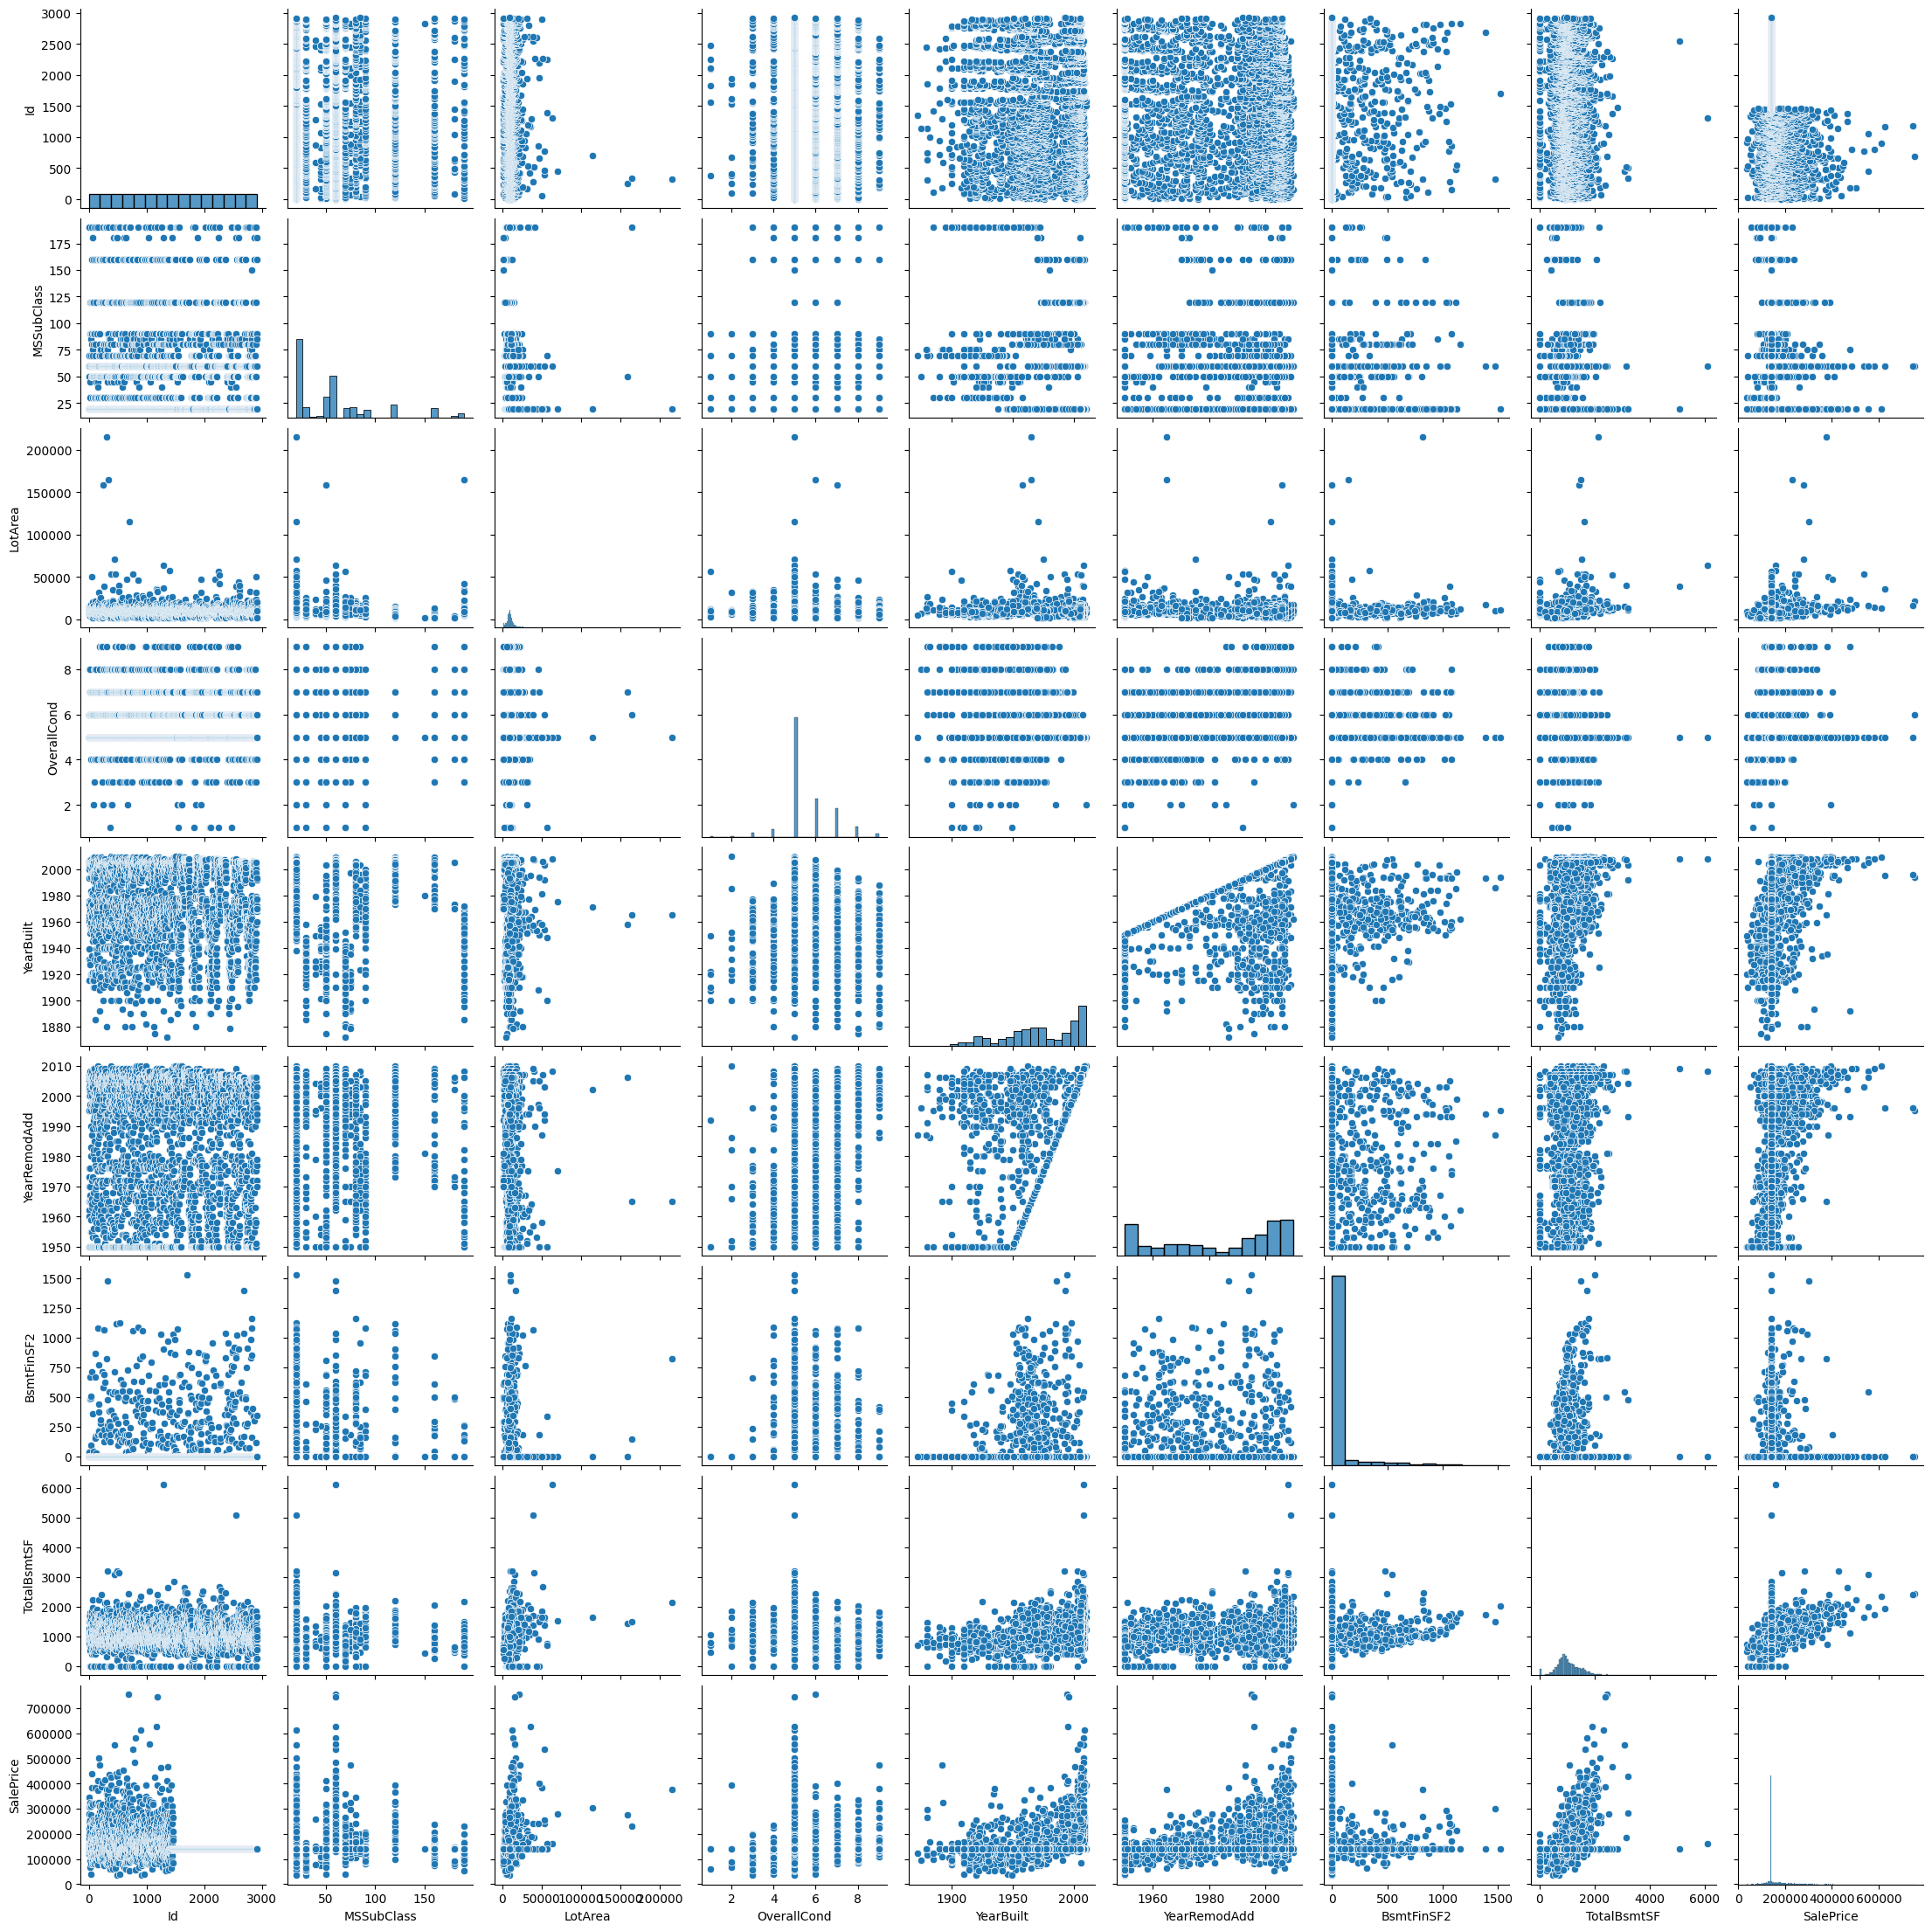

In [94]:
sns.pairplot(df)

# **Distribution of the sales price as per zoning**

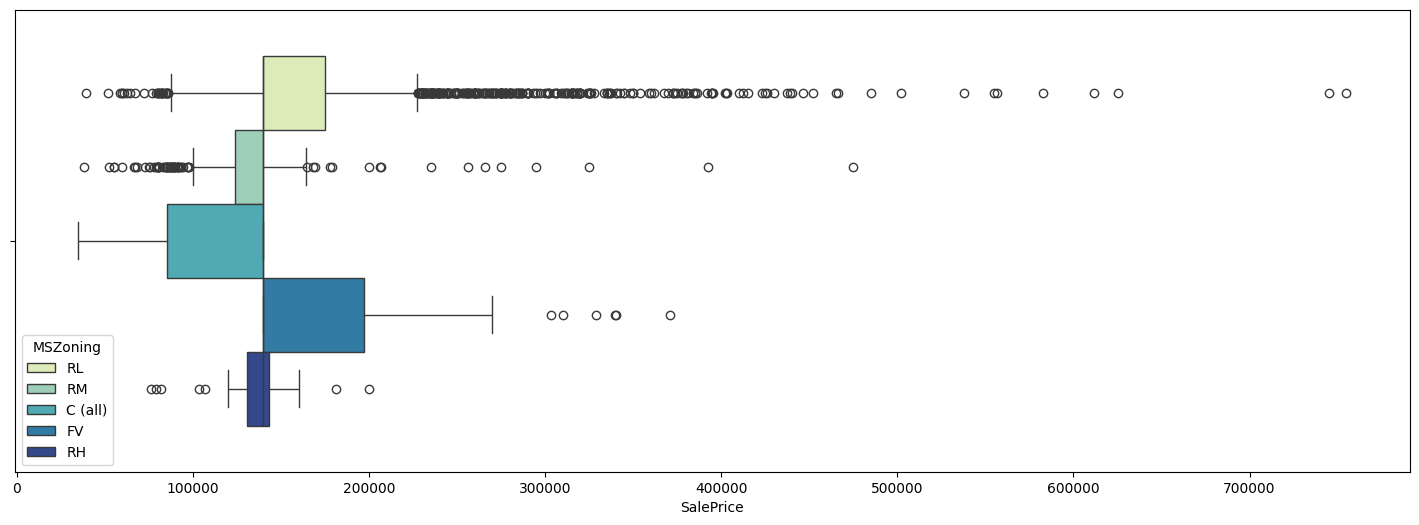

In [95]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df,x="SalePrice",palette="YlGnBu",hue='MSZoning')
plt.show()

<Axes: xlabel='MSSubClass', ylabel='count'>

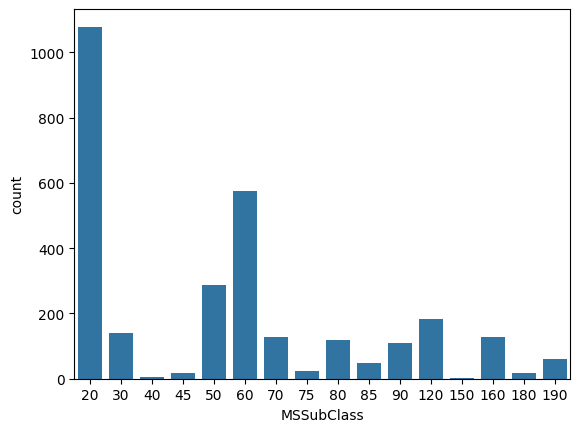

In [99]:
sns.countplot(x="MSSubClass",data=df)